# Dataset Analysis Project

## Introduction

Our data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue

* `tmdb-movies.csv`

We are going through multiple analysis and show some visualizations

* The most popular genres for each year
* The overall popular genre
* Top 10 movies with the highest revenue
* The properties of the most profitable movies
***
* [Data Wrangle](#Data-Wrangle).
* [Analysis and Visualisations](#Analysis-and-Visualisations).
* [Conclusion](#Conclusion).
* [Problems and Limitations](#Problems-and-Limitations).
***
## Data Wrangle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
def split(name):
    df = pd.DataFrame(columns=['id',name,'Movie_profit'])
    index = tmdb.loc[:,[name,'profit']].dropna().index
    for x in index:
        text = tmdb.loc[x,name].split('|')
        for y in text:
            df = df.append({'id':tmdb.loc[x,'id'],name:y,'Movie_profit':tmdb.loc[x,'profit']},ignore_index=True)
    df.to_csv((name+'.csv'),index=False)
    return df

In [3]:
tmdb = pd.read_csv("tmdb-movies.csv")
global tmdb

In [4]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
tmdb.duplicated().value_counts()

False    10865
True         1
dtype: int64

* Checking for duplicate values as we can see `TEKKEN` is duplicated and we should remove it.

In [6]:
tmdb[tmdb.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
tmdb.drop_duplicates(keep='first',inplace=True)
tmdb.iloc[[2089,2090],:]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2091,60309,tt0968264,0.591206,25000000,15478800,The Conspirator,Evan Rachel Wood|James McAvoy|Kevin Kline|Robi...,http://www.conspiratorthemovie.com/,Robert Redford,One bullet killed the President. But not one man.,...,Mary Surratt is the lone female charged as a c...,122,Crime|Drama|History,Wildwood Enterprises|American Film Company,9/10/10,78,5.9,2010,25000000.0,15478800.0


* as we can see there is no more duplicates

In [8]:
tmdb.duplicated().value_counts()

False    10865
dtype: int64

In [9]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [10]:
tmdb["keywords"].head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

* the `id` column must be object Data Type

In [11]:
tmdb=tmdb.astype({"id":object})
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  object 
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

* `release date` must be `datatime` data type not `object`

In [12]:
tmdb["release_date"] = pd.to_datetime(tmdb["release_date"])

In [13]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  object        
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

***

* as we can see 0 is inconsistent value for `budget`,`revenue` or `profit` tried to use [TMDB API](https://github.com/celiao/tmdbsimple) but found that some `id`s are wrong I tried to fix the ids by searching the `original_title` then obtaining the right id but found some titles not very correctly accurate so really it's very hopeless to clean such dirty data but we will replace 0 with `NaN` so it doesn't affect other analysis.

In [14]:
tmdb.iloc[:,[3,4]]=tmdb.iloc[:,[3,4]].replace(to_replace=0,value=np.nan)
tmdb.iloc[:,[3,4]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   5169 non-null   float64
 1   revenue  4849 non-null   float64
dtypes: float64(2)
memory usage: 254.6 KB


In [15]:
tmdb.insert(loc=5,column='profit',value=tmdb['revenue']-tmdb['budget'])
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  object        
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                5169 non-null   float64       
 4   revenue               4849 non-null   float64       
 5   profit                3854 non-null   float64       
 6   original_title        10865 non-null  object        
 7   cast                  10789 non-null  object        
 8   homepage              2936 non-null   object        
 9   director              10821 non-null  object        
 10  tagline               8041 non-null   object        
 11  keywords              9372 non-null   object        
 12  overview              10861 non-null  object        
 13  runtime         

* the code above shows the most popular genre for each year.

***

## Analysis and Visualisations

### The overall popular genre

In [16]:
%%time
genres = split('genres')

CPU times: user 26 s, sys: 54.9 ms, total: 26 s
Wall time: 26.1 s


In [17]:
genres.head()

,id,genres,Movie_profit
0,135397,Action,1.363529e+09
1,135397,Adventure,1.363529e+09
2,135397,Science Fiction,1.363529e+09
3,135397,Thriller,1.363529e+09
4,76341,Action,2.284364e+08


In [18]:
t = genres['genres'].value_counts(ascending=False)
t

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
Name: genres, dtype: int64

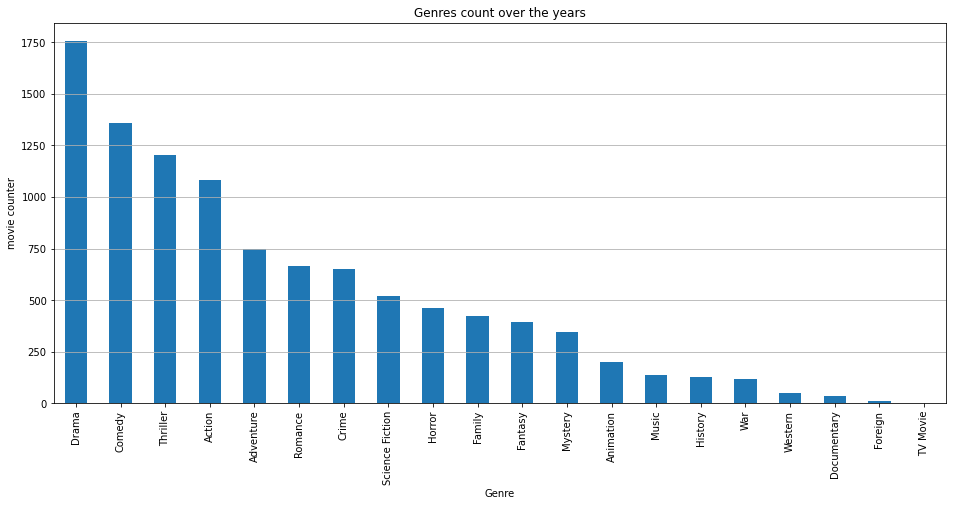

In [19]:
t.plot.bar(figsize=(16,7));
plt.title("Genres count over the years");
plt.ylabel("movie counter");
plt.xlabel("Genre");
plt.grid(axis='y');

* as we can see from our analysis Comdey movies are the most popular overall.

***

## Top 10 movies with the highest revenue

In [20]:
t = tmdb.sort_values(by="revenue",ascending=False).head(10)
t

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000.0,2.781506e+09,2.544506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,tt0120338,4.355219,200000000.0,1.845034e+09,1.645034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,tt0848228,7.637767,220000000.0,1.519558e+09,1.299558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
14,99861,tt2395427,5.944927,280000000.0,1.405036e+09,1.125036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,tt1201607,5.711315,125000000.0,1.327818e+09,1.202818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,http://www.harrypotter.com,David Yates,...,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,tt2294629,6.112766,150000000.0,1.274219e+09,1.124219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,...,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,68721,tt1300854,4.946136,200000000.0,1.215440e+09,1.015440e+09,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,http://marvel.com/ironman3,Shane Black,...,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013,1.872067e+08,1.137692e+09


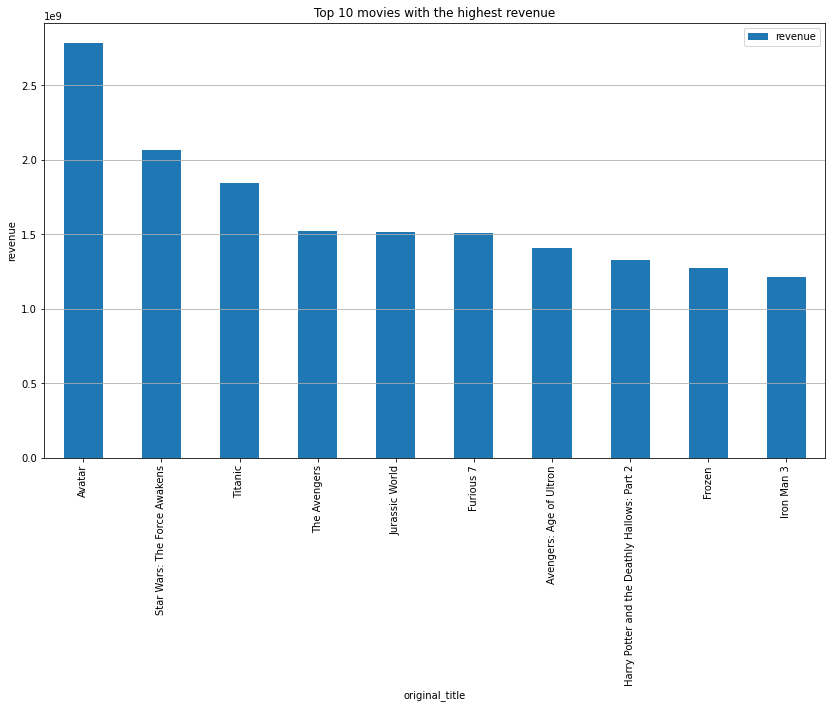

In [21]:
t.plot.bar(x="original_title",y="revenue",figsize=(14,8));
plt.title("Top 10 movies with the highest revenue");
plt.grid(axis='y');
plt.ylabel("revenue");

***
### Budget spent on Movies over the years.

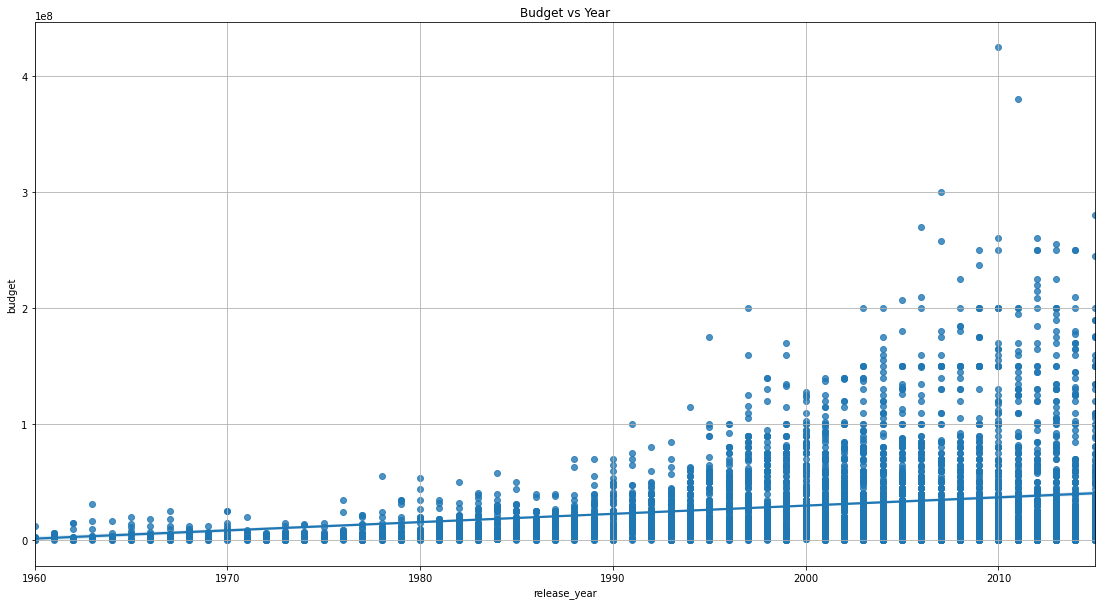

In [22]:
plt.figure(figsize=(19,10));
plt.grid(axis='both');
plt.title("Budget vs Year");
plt.ylabel("Total Budget Spent on producing movies");
sb.regplot(x=tmdb['release_year'],y=tmdb['budget'],scatter=True);

* as we can see as the year progressed the budget on producing movies has increased.

***

## The properties of the most profitable movies

In [23]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  object        
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                5169 non-null   float64       
 4   revenue               4849 non-null   float64       
 5   profit                3854 non-null   float64       
 6   original_title        10865 non-null  object        
 7   cast                  10789 non-null  object        
 8   homepage              2936 non-null   object        
 9   director              10821 non-null  object        
 10  tagline               8041 non-null   object        
 11  keywords              9372 non-null   object        
 12  overview              10861 non-null  object        
 13  runtime         

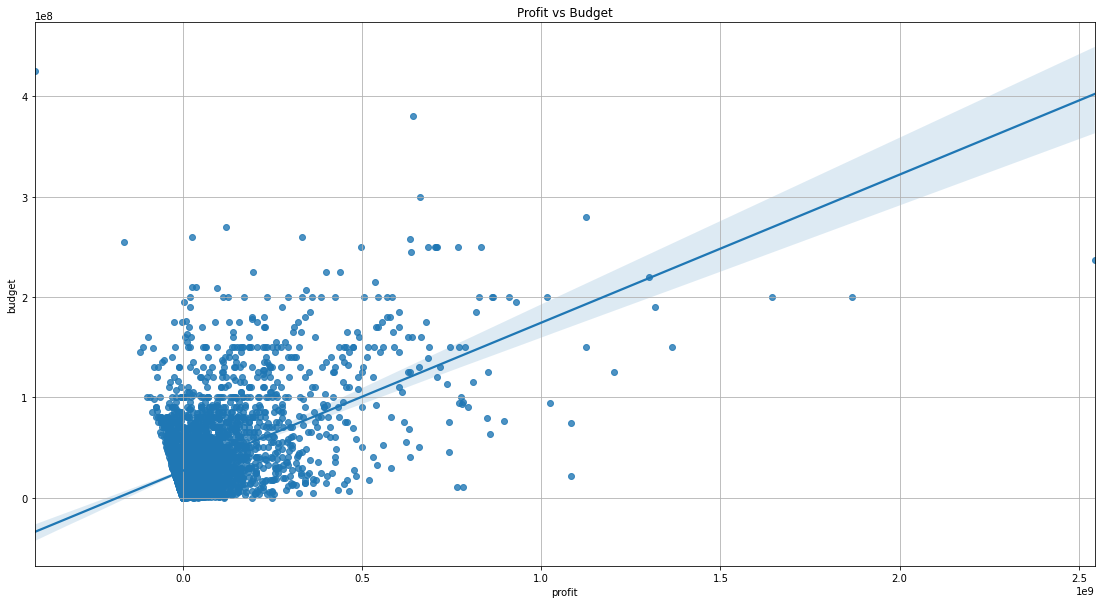

In [24]:
plt.figure(figsize=(19,10));
plt.grid(axis='both');
plt.title("Profit vs Budget");
plt.ylabel("Budget");
plt.xlabel("profit");
sb.regplot(x=tmdb['profit'],y=tmdb['budget']);

* not so much we can obtain from this graph except for the strong direct propotion relationship between the profits and the budgets $profit \propto budget$

* the most profitable movies (1:1.5 Billion) seems to cost on average between (10 to 20 Millions) also the in that range we can notice that the least no of the movies that couldn't profit lie in that range.

* movies with the highest budgets didn't generate the highest profits.

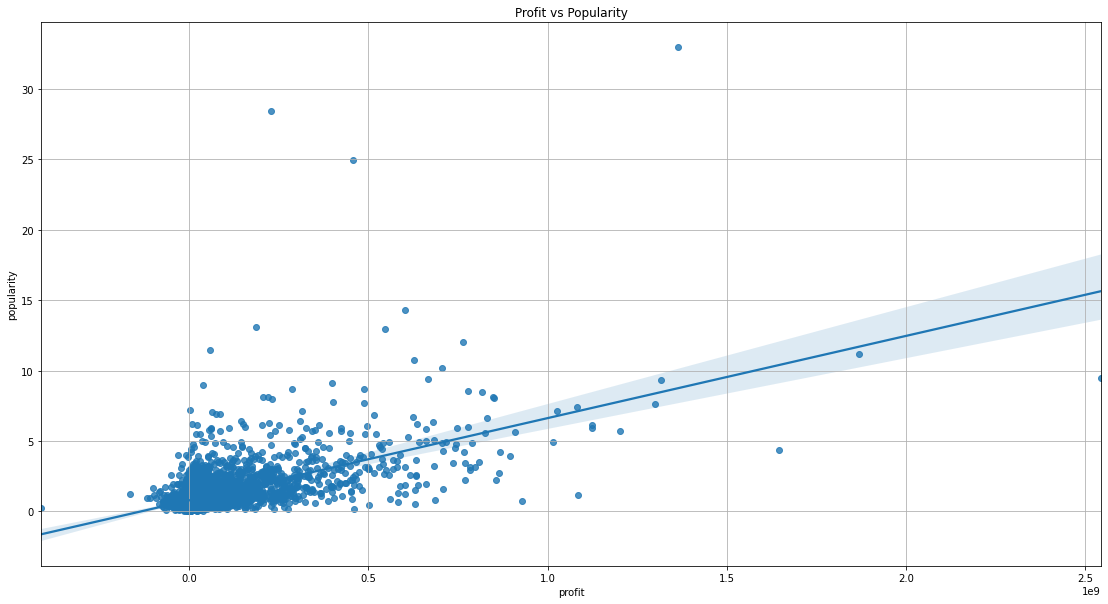

In [25]:
plt.figure(figsize=(19,10));
plt.grid(axis='both');
plt.title("Profit vs Popularity");
plt.ylabel("Popularity");
plt.xlabel("Profit");
sb.regplot(x=tmdb['profit'],y=tmdb['popularity']);

* the most popular movies that rated above 10 aren't the most profitable ones.

* the most profitable movies (above 1 billion in profits) scored above 5 points in popularity

* nearly all the movies that didn't generate profits scored less than 5 points in popularity

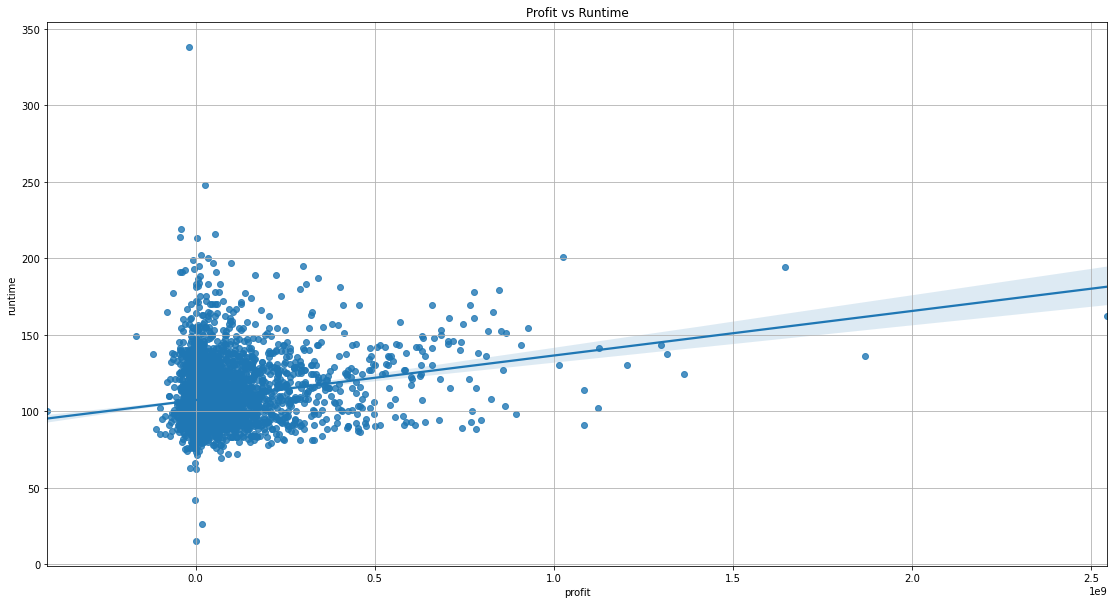

In [26]:
plt.figure(figsize=(19,10));
plt.grid(axis='both');
plt.title("Profit vs Runtime");
plt.ylabel("Runtim");
plt.xlabel("Profit");
sb.regplot(x=tmdb['profit'],y=tmdb['runtime']);

* the runtime for the most profitable movies was between (100 to 150) minutes.

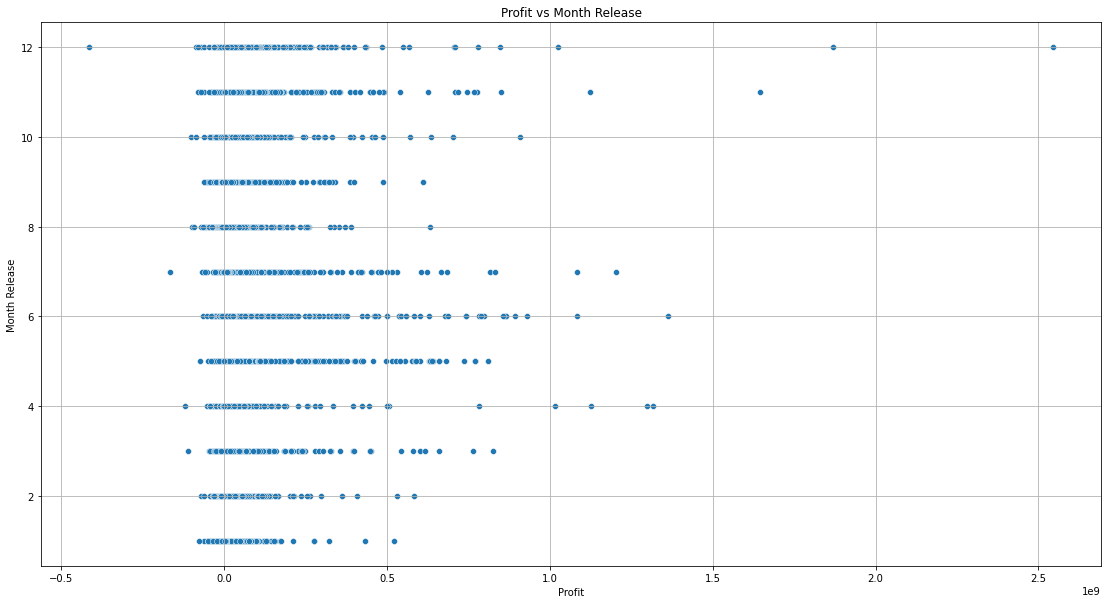

In [27]:
plt.figure(figsize=(19,10));
plt.grid(axis='both');
plt.title("Profit vs Month Release");
plt.ylabel("Month Release");
plt.xlabel("Profit");
sb.scatterplot(x=tmdb['profit'],y=tmdb['release_date'].dt.month);

* the most profitable movies were released between in April and Agust

***

In [28]:
%%time
director = split('director')

CPU times: user 10.4 s, sys: 20.5 ms, total: 10.4 s
Wall time: 10.6 s


In [29]:
director

,id,director,Movie_profit
0,135397,Colin Trevorrow,1.363529e+09
1,76341,George Miller,2.284364e+08
2,262500,Robert Schwentke,1.852382e+08
3,140607,J.J. Abrams,1.868178e+09
4,168259,James Wan,1.316249e+09
...,...,...,...
4159,396,Mike Nichols,2.623669e+07
4160,5780,Alfred Hitchcock,1.000000e+07
4161,6644,Howard Hawks,1.347000e+06
4162,5923,Robert Wise,8.000000e+06


In [30]:
director.groupby('director').median().sort_values(by='Movie_profit',ascending=False)

,Movie_profit
director,
Jennifer Lee,1.124219e+09
Irwin Winkler,1.084280e+09
Pierre Coffin,8.947619e+08
Mike Thurmeier,7.822448e+08
David Yates,7.462593e+08
...,...
Lawrence Kasanoff,-6.492629e+07
Joby Harold,-7.162618e+07
Aaron Blaise,-9.999975e+07


* according to the above analysis **Jennifer Lee** is the most successful director with the highest median of profitable movies.

***

In [31]:
%%time
production_companies = split('production_companies')

CPU times: user 27.2 s, sys: 68 ms, total: 27.3 s
Wall time: 27.5 s


In [32]:
production_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10584 entries, 0 to 10583
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10584 non-null  object 
 1   production_companies  10584 non-null  object 
 2   Movie_profit          10584 non-null  float64
dtypes: float64(1), object(2)
memory usage: 248.2+ KB


In [33]:
production_companies.head()

,id,production_companies,Movie_profit
0,135397,Universal Studios,1.363529e+09
1,135397,Amblin Entertainment,1.363529e+09
2,135397,Legendary Pictures,1.363529e+09
3,135397,Fuji Television Network,1.363529e+09
4,135397,Dentsu,1.363529e+09


In [34]:
production_companies.groupby(by='production_companies').median().sort_values(by='Movie_profit',ascending=False)

,Movie_profit
production_companies,
Truenorth Productions,1.868178e+09
Cool Music,7.882127e+08
Harry Potter Publishing Rights,7.882127e+08
The Saul Zaentz Company,7.783684e+08
MIRACLE Productions GmbH & Co. KG,7.766885e+08
...,...
Screenland Pictures,-7.517192e+07
ScreenWest,-8.044600e+07
Blind Wink Productions,-1.657101e+08


* from the above analysis the **Truenorth Productions** company has the highest median of profitable movies.
***

In [35]:
genres.groupby(by='genres').median().sort_values(by='Movie_profit',ascending=False)

,Movie_profit
genres,
Animation,110161792.0
Family,57634409.0
Fantasy,52149244.5
Adventure,51000000.0
TV Movie,37000000.0
Action,30795814.0
War,22900000.0
Science Fiction,22120318.0
Comedy,21552781.5


* as we can see the **Animation** is the highest genre with median profit value.
***

## Conclusion 

* **Animation** is the most profitable genre movie.
* **Truenorth Productions** is the most profitable movie company.
* **Jennifer Lee** is the most successful director.
* months from **April to Agust** are the perfect timing for releasing movies.
* **100:150 min** are good runtimes for movies.
* the movies mustn't be below 5 points of popularity 
* **10:20 Millions** is a good and reasonable budget for movies.

All those aspects must be considered for boosting the profits of movies based on the above visualizations and analysis.
***

## Problems and Limitations

* **The Data isn't cleaned**
> our Data is very dirty in a large scale as mentioned at the earlier of the report we have missing, wrong or inconsistent `budget`,`revenue` values, we tried to use IMDB API to fix it but we found that there are many wrong `id` movies, we tried to use their `original_title` but this data wasn't cleaned either, so it was really pointless to clean it so we just replaced our inconsistent values with`NaN` so it doesn't affect our analysis, as you can see in the command line there are 10K entries in our data but less than their have is actually usefull data and there may also be inaccurate values within these data let's do some numbers.

In [36]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  object        
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                5169 non-null   float64       
 4   revenue               4849 non-null   float64       
 5   profit                3854 non-null   float64       
 6   original_title        10865 non-null  object        
 7   cast                  10789 non-null  object        
 8   homepage              2936 non-null   object        
 9   director              10821 non-null  object        
 10  tagline               8041 non-null   object        
 11  keywords              9372 non-null   object        
 12  overview              10861 non-null  object        
 13  runtime         

In [37]:
3854/10865*100

35.471698113207545

> as you can see only %35.5 percent of our data is what we actually deal with and there may be some wrong values within this data too, to obtain more accurate analysis we may gather the data using TMDB API all over again.

* **Not much of profitable movies**
> we tried to study the properties of profitable movies but we had hard time to find or define what makes a profitable movie or in what range of profits should we call a movie a profitable one let's see a histogram.

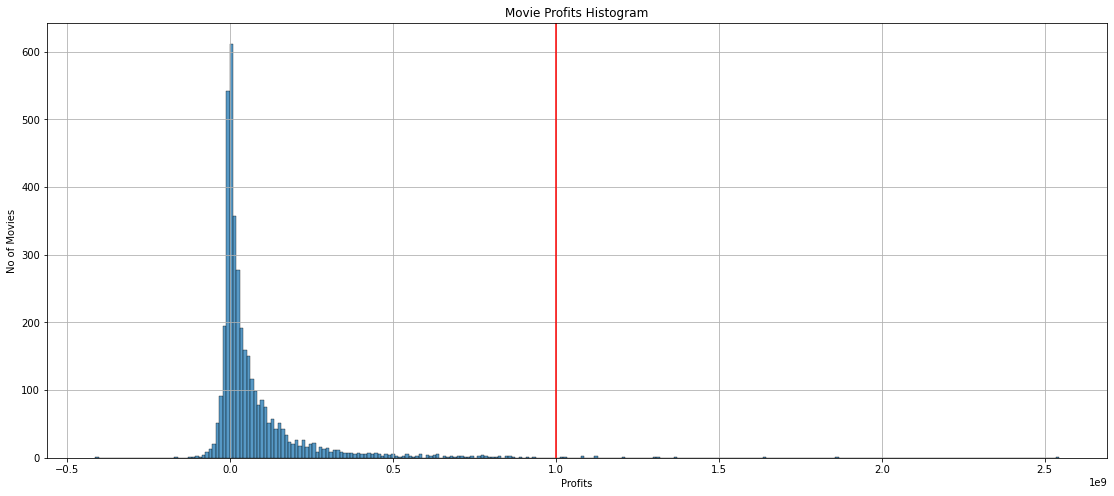

In [38]:
plt.figure(figsize=(19,8))
sb.histplot(data=tmdb,x='profit')
plt.title("Movie Profits Histogram")
plt.ylabel("No of Movies")
plt.xlabel("Profits")
plt.axvline(1e9,c='r')
plt.grid(axis='both')

In [39]:
(tmdb['profit'] >= 1e9).mean()*100

0.11965025310630466

In [40]:
(tmdb['profit'] >= 1e9).value_counts()

False    10852
True        13
Name: profit, dtype: int64

> as we can see above most of the movies we are dealing with in our data lies in profit range between (-0.75:0.25 Billion) in profits while the second most group presented in our data their profits lies in(0.25:0.8 Billion) so as we can see that most of the movies in our data aren't actually very profitable at least from my view perspective point, only a small amount of movies are profitable which lies in the range (1:1.5 Billion) only 13 observations which are 0.11% of our data, so to obtain more accurate results and analysis about profitable movies we need to regather data about movies their profits are above 1Billion dollar.

* This document is written by [**Yousef Mohammed Saber**](https://github.com/YousefSaber/Data-Analysis-Project).
***